# Generate 8 images between given 2 latent vectors

In [1]:
import torch
import torch.nn as nn

nz = 100
ngf = 64
nc = 3

class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input.reshape(-1, nz, 1, 1))

t:\win_programs\python_venvs\deeplearning\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = './DLGAN-20__generator_model.pth'
model = torch.load(path, map_location=torch.device('cpu'))

## Interpolation between 2 latent vectors

Cherry picked 2 latent vectors from the latent space and generated 8 images between them.

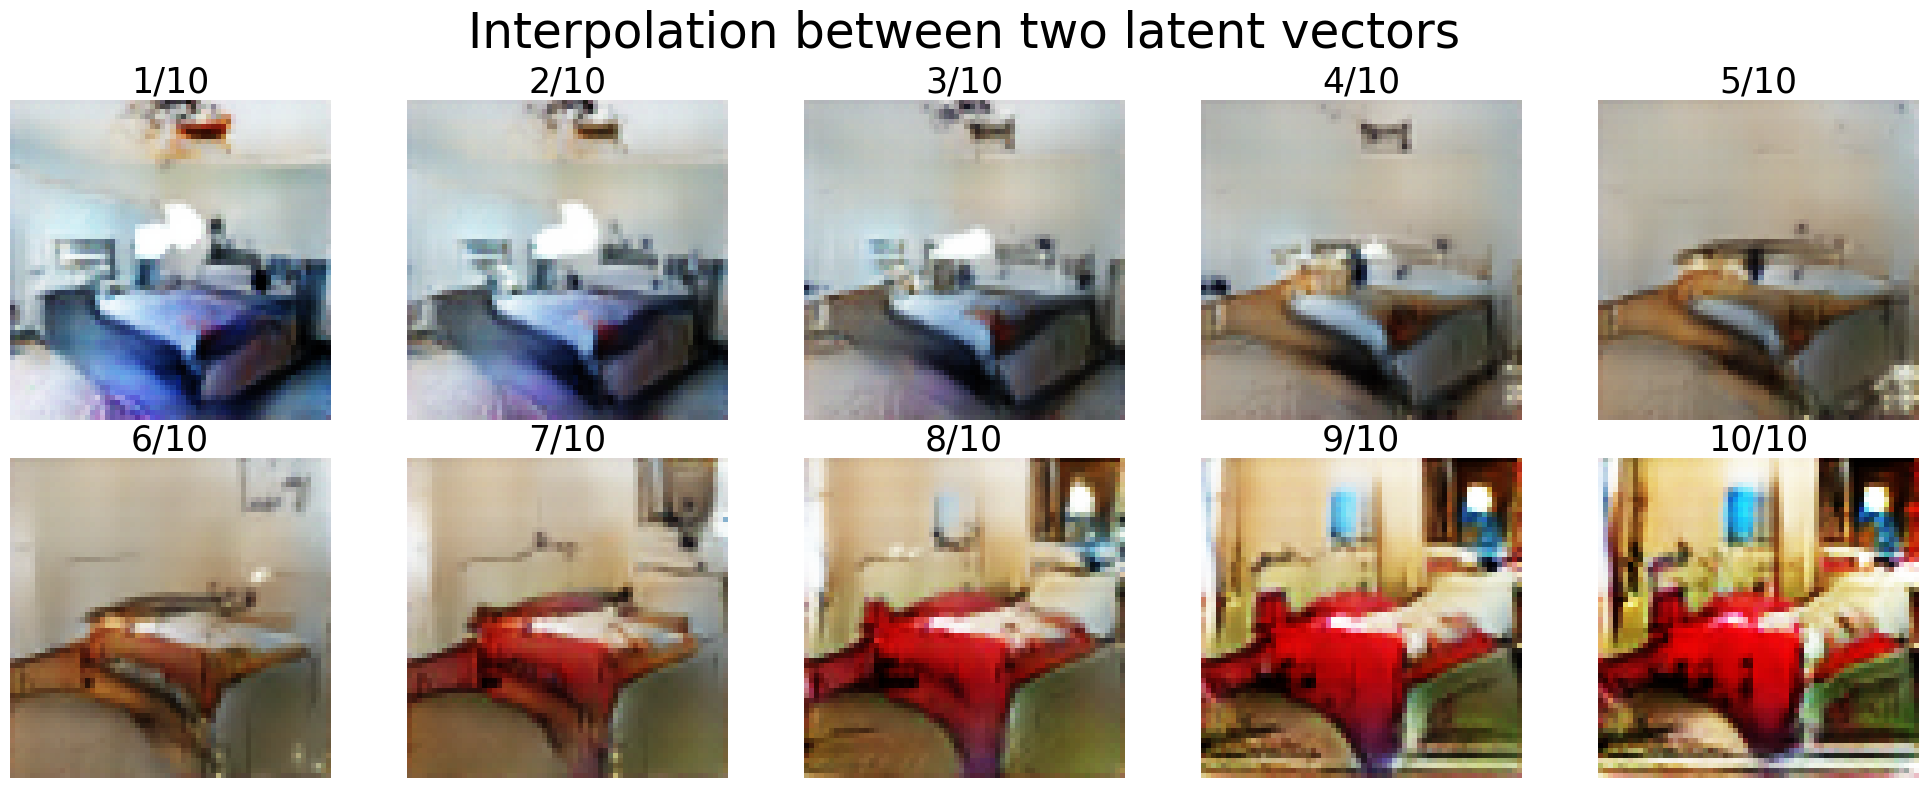

In [11]:
import matplotlib.pyplot as plt
import numpy as np

noises = []

# hand-picked seeds 4 and 10
torch.manual_seed(4)
noise = torch.randn(2, nz, 1, 1)
noises.append(noise)

torch.manual_seed(10)
noise = torch.randn(2, nz, 1, 1)
noises.append(noise)

list_of_latent_vectors = []
list_of_latent_vectors.append(noises[0][1])
for i in range(1, 9):
    list_of_latent_vectors.append((noises[1][0] - noises[0][1]) * i / 9 + noises[0][1])
list_of_latent_vectors.append(noises[1][0])
selected_noises = torch.stack(list_of_latent_vectors)

fig, ax = plt.subplots(2, 5, figsize=(20, 8))
output = model(selected_noises)
output = output.detach().numpy()
output = (output + 1) / 2
output = np.transpose(output, (0, 2, 3, 1))
for i in range(2):
    for j in range(5):
        ax[i, j].imshow(output[i * 5 + j])
        ax[i, j].axis('off')
# fig.tight_layout()

for i in range(2):
    for j in range(5):
        ax[i,j].set_title(f'{i*5+j+1}/10', fontsize=25)

for axi in ax.flat:
    axi.set_xticks([])
    axi.set_yticks([])

fig.suptitle('Interpolation between two latent vectors', fontsize=35)
fig.tight_layout()
plt.show()